# Step 1: Sanity check and data Cleaning

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read the csv file from current directory
df = pd.read_csv("loan.csv", low_memory=False)

# View first 5 rows 
df.head()

# View shape
df.shape

(39717, 111)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
# analyse the null values in each column
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [5]:
# From the above stats we can say that there columns with all null values, therefore, let's drop those columns
df1 = df.drop(df.columns[(df.isnull().sum()/len(df.index))>0.05], axis=1)
df1.isnull().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal           

Following Columns are not going to be considered for analysis and hence will be dropped. 
Columns Removed
acc_now_delinq
acc_open_past_24mths
all_util
annual_inc_joint
application_type
avg_cur_bal
bc_open_to_buy
bc_util
chargeoff_within_12_mths
collections_12_mths_ex_med
delinq_amnt
dti_joint
il_util
initial_list_status
inq_fi
inq_last_12m
last_pymnt_amnt
last_pymnt_d
max_bal_bc
mo_sin_old_il_acct
mo_sin_old_rev_tl_op
mo_sin_rcnt_rev_tl_op
mo_sin_rcnt_tl
mort_acc
mths_since_last_delinq
mths_since_last_major_derog
mths_since_last_record
mths_since_rcnt_il
mths_since_recent_bc
mths_since_recent_bc_dlq
mths_since_recent_inq
mths_since_recent_revol_delinq
next_pymnt_d
num_accts_ever_120_pd
num_actv_bc_tl
num_actv_rev_tl
num_bc_sats
num_bc_tl
num_il_tl
num_op_rev_tl
num_rev_accts
num_rev_tl_bal_gt_0
num_sats
num_tl_120dpd_2m
num_tl_30dpd
num_tl_90g_dpd_24m
num_tl_op_past_12m
open_acc_6m
open_il_12m
open_il_24m
open_il_6m
open_rv_12m
open_rv_24m
pct_tl_nvr_dlq
percent_bc_gt_75
policy_code
pymnt_plan
tax_liens
tot_coll_amt
tot_cur_bal
tot_hi_cred_lim
total_bal_ex_mort
total_bal_il
total_bc_limit
total_cu_tl
total_il_high_credit_limit
total_rev_hi_lim
url
verification_status_joint
zip_code

In [6]:
# let's choose columns which are not useful for the analysis
df1.drop(["pymnt_plan", "url", "zip_code", "last_pymnt_d", "last_pymnt_amnt", "initial_list_status", "collections_12_mths_ex_med", "policy_code", "application_type", "acc_now_delinq", "chargeoff_within_12_mths", "delinq_amnt", "tax_liens"], inplace=True, axis=1)
df1.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
title                        11
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_py

In [7]:
df1.loc[df["pub_rec_bankruptcies"].isnull(), ["pub_rec_bankruptcies"]] = 0
df1.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
title                        11
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_py

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_length               38642 non-null  object 
 11  home_ownership           39717 non-null  object 
 12  annual_inc               39717 non-null  float64
 13  verification_status      39717 non-null  object 
 14  issue_d               

In [9]:
# Employee cleansning, 2 points addressed are replace blanks with 0 years and remove strings/years to mark it numeric data only. 
df1.loc[df1["emp_length"].isnull(), ("emp_length")] = "0 year"
df1.isnull().sum()

id                          0
member_id                   0
loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                      11
addr_state                  0
dti                         0
delinq_2yrs                 0
earliest_cr_line            0
inq_last_6mths              0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                 50
total_acc                   0
out_prncp                   0
out_prncp_inv               0
total_pymnt                 0
total_pymnt_inv             0
total_rec_prncp             0
total_rec_

In [10]:
#Consider data frame of members with loan status "Charged Off" and "Fully Paid"
df1 = df1[df1["loan_status"] != "Current"]
df1.shape

(38577, 39)

In [11]:
#Dataframe for Charged off employees only
charged_off = df1[df1["loan_status"] == "Charged Off"]
charged_off.shape

(5627, 39)

In [12]:
#Dataframe for Fully Paid employees only
fully_paid = df1[df1["loan_status"] == "Fully Paid"]
fully_paid.shape

(32950, 39)

In [13]:
# Function to later perform strong operation on Employee Length 
def emp_len(x):
    if x == "10+ years":
        return 10
    elif x == "< 1 year":
        return 0
    else:
        return int(x.replace("years","").replace("year", "").strip())

In [14]:
# #Edit employee length for describing the years of experience. 
df1["emp_length"] = df1["emp_length"].apply(lambda x: emp_len(x))
df1["emp_length"]

0        10
1         0
2        10
3        10
5         3
         ..
39712     4
39713     3
39714     0
39715     0
39716     0
Name: emp_length, Length: 38577, dtype: int64

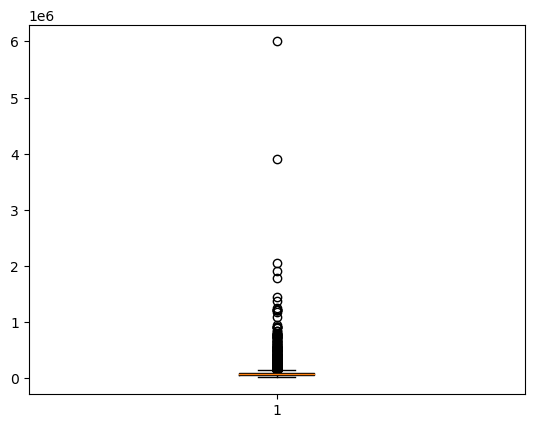

In [15]:
# Plot a boxplot of Annual income to view the outliers and then accrodingly take action. 
plt.boxplot(df1["annual_inc"])
plt.show()

In [16]:
#Outlier treatment for Annual Income 

df1[(df1["annual_inc"]>=130000)].shape

(2631, 39)

In [17]:
# Since we have more outlier, get another view. 
df1.loc[(df1["annual_inc"]>=130000) & (df1["emp_length"]<1), ("annual_inc")] = df1[df1["annual_inc"]<130000]["annual_inc"].quantile(0.1)
df1.loc[(df1["annual_inc"]>=130000) & (df1["emp_length"]<2), ("annual_inc")] = df1[df1["annual_inc"]<130000]["annual_inc"].quantile(0.2)
df1.loc[(df1["annual_inc"]>=130000) & (df1["emp_length"]<3), ("annual_inc")] = df1[df1["annual_inc"]<130000]["annual_inc"].quantile(0.3)
df1.loc[(df1["annual_inc"]>=130000) & (df1["emp_length"]<4), ("annual_inc")] = df1[df1["annual_inc"]<130000]["annual_inc"].quantile(0.4)
df1.loc[(df1["annual_inc"]>=130000) & (df1["emp_length"]<5), ("annual_inc")] = df1[df1["annual_inc"]<130000]["annual_inc"].quantile(0.5)
df1.loc[(df1["annual_inc"]>=130000) & (df1["emp_length"]<6), ("annual_inc")] = df1[df1["annual_inc"]<130000]["annual_inc"].quantile(0.6)
df1.loc[(df1["annual_inc"]>=130000) & (df1["emp_length"]<7), ("annual_inc")] = df1[df1["annual_inc"]<130000]["annual_inc"].quantile(0.7)
df1.loc[(df1["annual_inc"]>=130000) & (df1["emp_length"]<8), ("annual_inc")] = df1[df1["annual_inc"]<130000]["annual_inc"].quantile(0.8)
df1.loc[(df1["annual_inc"]>=130000) & (df1["emp_length"]<9), ("annual_inc")] = df1[df1["annual_inc"]<130000]["annual_inc"].quantile(0.9)
df1.loc[(df1["annual_inc"]>=130000), ("annual_inc")] = df1[df1["annual_inc"]<130000]["annual_inc"].max()

    

In [18]:
df1.shape

(38577, 39)

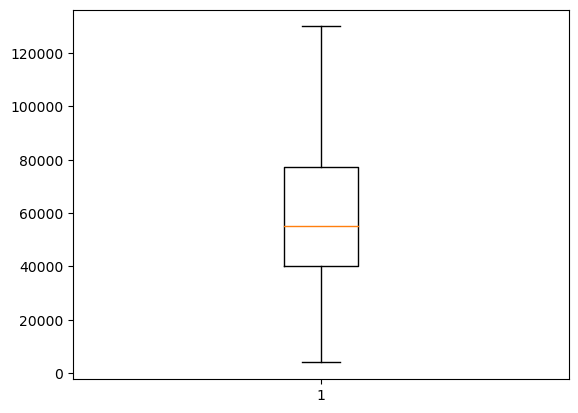

In [19]:
# This looks good - Annual Income Boxplot
plt.boxplot(df1["annual_inc"])
plt.show()

In [20]:
# Verify median for annual income
df1["annual_inc"].describe()

count     38577.000000
mean      60777.272017
std       27667.440282
min        4000.000000
25%       40000.000000
50%       55200.000000
75%       77350.000000
max      129996.000000
Name: annual_inc, dtype: float64

In [21]:
df1.shape

(38577, 39)

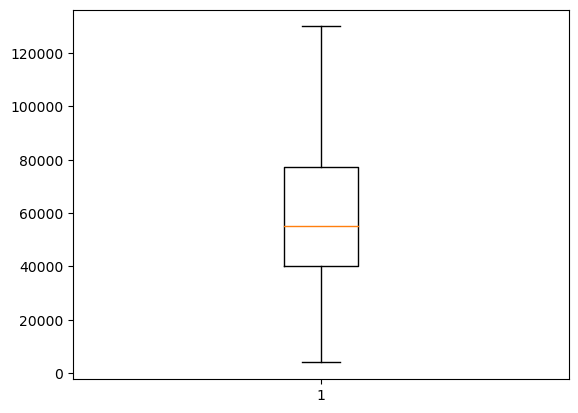

In [22]:
# Box plot for Annual Income
plt.boxplot(df1["annual_inc"])
plt.show()

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38577 non-null  int64  
 1   member_id                38577 non-null  int64  
 2   loan_amnt                38577 non-null  int64  
 3   funded_amnt              38577 non-null  int64  
 4   funded_amnt_inv          38577 non-null  float64
 5   term                     38577 non-null  object 
 6   int_rate                 38577 non-null  object 
 7   installment              38577 non-null  float64
 8   grade                    38577 non-null  object 
 9   sub_grade                38577 non-null  object 
 10  emp_length               38577 non-null  int64  
 11  home_ownership           38577 non-null  object 
 12  annual_inc               38577 non-null  float64
 13  verification_status      38577 non-null  object 
 14  issue_d               

In [24]:
# Data treatment for Int_Rate - Remove %
df1["int_rate"] = df1["int_rate"].apply(lambda x: float(x[:-1]))

In [25]:
# Terms number of months changed to contain only month and integer value
df1["term"] = df1["term"].apply(lambda x: int(x.replace("months", "").strip()))

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38577 non-null  int64  
 1   member_id                38577 non-null  int64  
 2   loan_amnt                38577 non-null  int64  
 3   funded_amnt              38577 non-null  int64  
 4   funded_amnt_inv          38577 non-null  float64
 5   term                     38577 non-null  int64  
 6   int_rate                 38577 non-null  float64
 7   installment              38577 non-null  float64
 8   grade                    38577 non-null  object 
 9   sub_grade                38577 non-null  object 
 10  emp_length               38577 non-null  int64  
 11  home_ownership           38577 non-null  object 
 12  annual_inc               38577 non-null  float64
 13  verification_status      38577 non-null  object 
 14  issue_d               

# Step 2: UniVariate Analysis

In [27]:
charged_off = df1[df1["loan_status"] == "Charged Off"]
charged_off.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_credit_pull_d,pub_rec_bankruptcies
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,0.0,1008.71,1008.71,456.46,435.17,0.0,117.08,1.1100,Sep-13,0.0
8,1071795,1306957,5600,5600,5600.0,60,21.28,152.39,F,F2,...,0.0,646.02,646.02,162.02,294.94,0.0,189.06,2.0900,Aug-12,0.0
9,1071570,1306721,5375,5375,5350.0,60,12.69,121.45,B,B5,...,0.0,1476.19,1469.34,673.48,533.42,0.0,269.29,2.5200,Mar-13,0.0
12,1064687,1298717,9000,9000,9000.0,36,13.49,305.38,C,C1,...,0.0,2270.70,2270.70,1256.14,570.26,0.0,444.30,4.1600,Nov-12,0.0
14,1069057,1303503,10000,10000,10000.0,36,10.65,325.74,B,B2,...,0.0,7471.99,7471.99,5433.47,1393.42,0.0,645.10,6.3145,Mar-14,0.0


In [28]:
n_charged_off = df1[df1["loan_status"] != "Charged Off"]
n_charged_off.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.0,May-16,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.0,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.0,Apr-16,0.0
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,...,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.0,0.0,Jan-16,0.0
6,1069639,1304742,7000,7000,7000.0,60,15.96,170.08,C,C5,...,0.0,10110.840000,10110.84,6985.61,3125.23,0.00,0.0,0.0,May-16,0.0


In [29]:
fully_paid = df1[df1["loan_status"] == "Fully Paid"]
fully_paid.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.0,May-16,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.0,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.0,Apr-16,0.0
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,...,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.0,0.0,Jan-16,0.0
6,1069639,1304742,7000,7000,7000.0,60,15.96,170.08,C,C5,...,0.0,10110.840000,10110.84,6985.61,3125.23,0.00,0.0,0.0,May-16,0.0


Univariate Graph 1


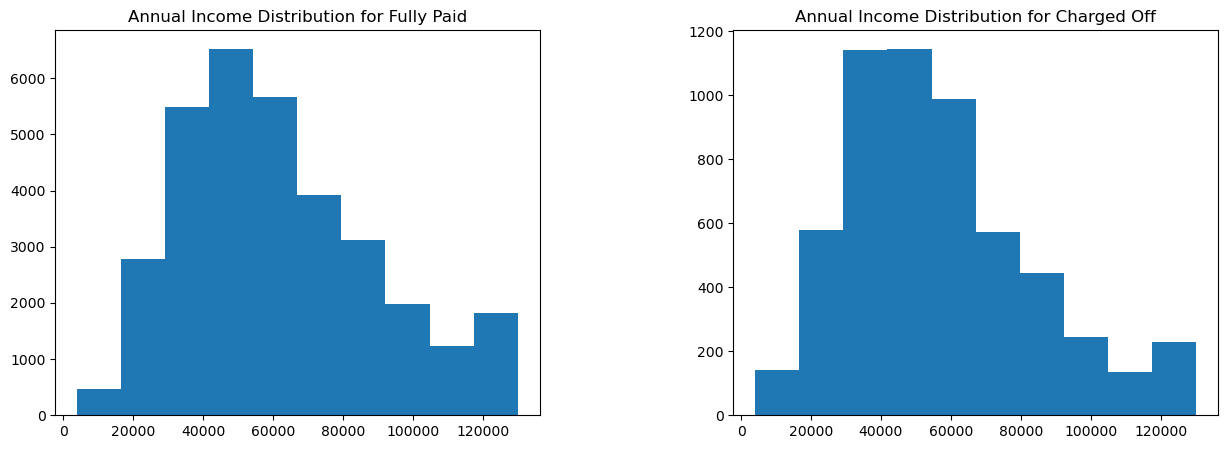

In [30]:
print("Univariate Graph 1")
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5),
                       gridspec_kw={
                           'width_ratios': [1, 1],
                           'height_ratios': [1],
                       'wspace': 0.4,
                       'hspace': 0.4})
ax[0].hist(fully_paid.annual_inc)
ax[0].set_title("Annual Income Distribution for Fully Paid")
ax[1].hist(charged_off.annual_inc)
ax[1].set_title("Annual Income Distribution for Charged Off")
plt.show()

#Observation
# 30k-50k is the peak income of charged off members while 50k-60k is the peak income of fully paid members. 


In [31]:
print("Univariate Graph 2")
# Loan amount distribution across members availing loan
short_term = df1[df1.term == 36]
long_term = df1[df1.term == 60]
print(short_term.shape)
print(long_term.shape)

Univariate Graph 2
(29096, 39)
(9481, 39)


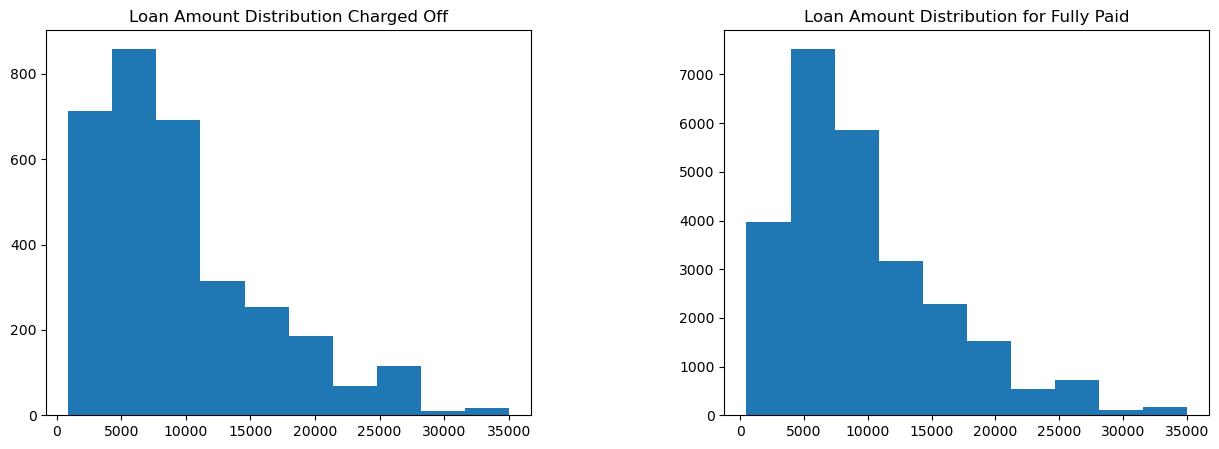

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5),
                       gridspec_kw={
                           'width_ratios': [1, 1],
                           'height_ratios': [1],
                       'wspace': 0.4,
                       'hspace': 0.4})
ax[0].hist(short_term[short_term["loan_status"]=="Charged Off"].loan_amnt)
ax[0].set_title("Loan Amount Distribution Charged Off")
ax[1].hist(short_term[short_term["loan_status"]=="Fully Paid"].loan_amnt)
ax[1].set_title("Loan Amount Distribution for Fully Paid")
plt.show()

# Observation
# For Short Term tenure, among charged off members, higher number of charged off is when the loan amount is between 500-8000. 

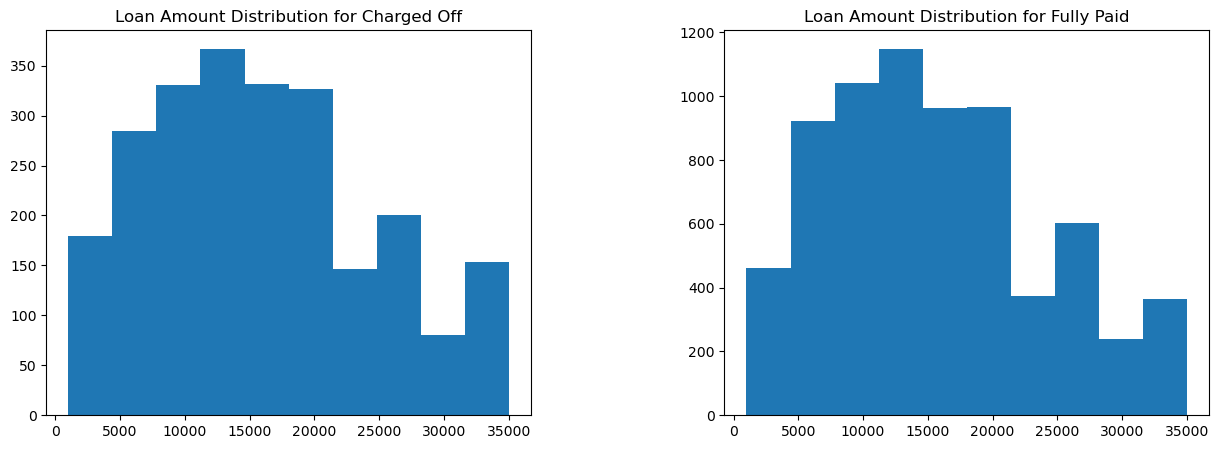

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5),
                       gridspec_kw={
                           'width_ratios': [1, 1],
                           'height_ratios': [1],
                       'wspace': 0.4,
                       'hspace': 0.4})
ax[0].hist(long_term[long_term["loan_status"]=="Charged Off"].loan_amnt)
ax[0].set_title("Loan Amount Distribution for Charged Off")
ax[1].hist(long_term[long_term["loan_status"]=="Fully Paid"].loan_amnt)
ax[1].set_title("Loan Amount Distribution for Fully Paid")
plt.show()
# Observation
# For Long Term tenure, among charged off members, higher number of charged off is when the loan amount is between 500-5000.

# Step 3: BiVariate/Multivariate Analysis

Graph 1


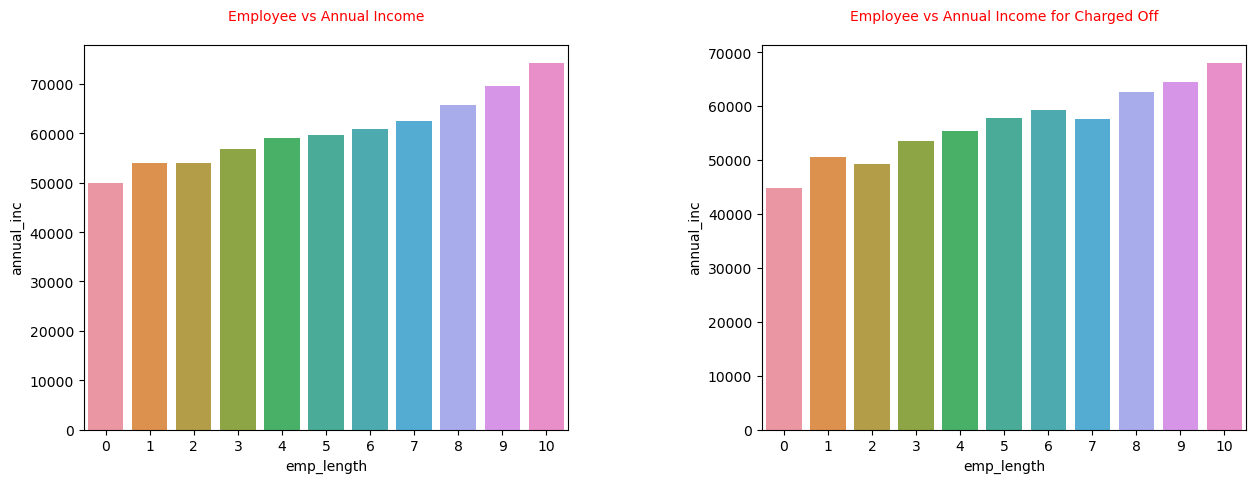

In [34]:
print("Graph 1")
# Employee Length vs Average Annual Income. Bar Chart
# 2 Graphs next to each other. One with Charged off, and next with Current+Fully Paid
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5),
                       gridspec_kw={
                           'width_ratios': [1, 1],
                           'height_ratios': [1],
                       'wspace': 0.4,
                       'hspace': 0.4})
tempdf = df1[['emp_length', 'annual_inc']].groupby(['emp_length'], as_index=False).mean()
tempdf.sort_values(by='emp_length', ascending=False, inplace=True)
sns.barplot(x='emp_length', y = 'annual_inc', data = tempdf, ax=ax[0])
ax[0].set_title('Employee vs Annual Income\n',fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Red'})
tempdf1 = df1[df1["loan_status"] == "Charged Off"]
tempdf2 = tempdf1[['emp_length', 'annual_inc']].groupby(['emp_length'], as_index=False).mean()
tempdf2.sort_values(by='emp_length', ascending=False, inplace=True)
sns.barplot(x='emp_length', y = 'annual_inc', data = tempdf2, ax=ax[1])
ax[1].set_title('Employee vs Annual Income for Charged Off\n',fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Red'})
plt.show()

# Observation - 
# 1. For all 3 loan status (Current, Charged off and Fully paid), the average annual income is increasing with the Employee Length.
# 2. For Loan Status - Charged Off, the average annual income is lower compared to all other Loan status considered. 

Graph 2


<Axes: xlabel='loan_status', ylabel='loan_amnt'>

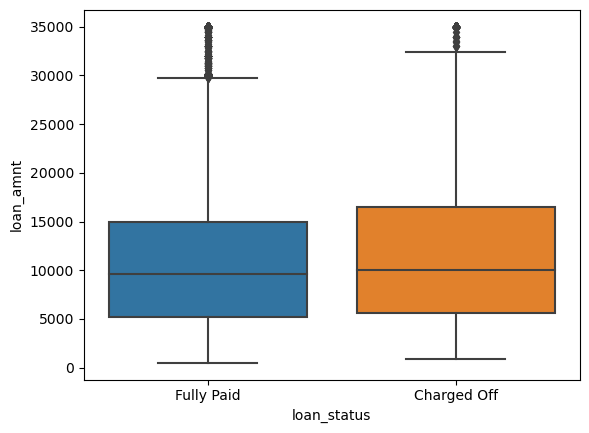

In [35]:
print("Graph 2")
# Loan_amnt. Box Plot
sns.boxplot(x=df1["loan_status"], y=df1["loan_amnt"])

#Observation -
# The loan amount taken by Charged off members between 25-75 percentile range is slightly higher than the loan amount taken by Fully paid members.  

Graph 3


<Axes: xlabel='purpose'>

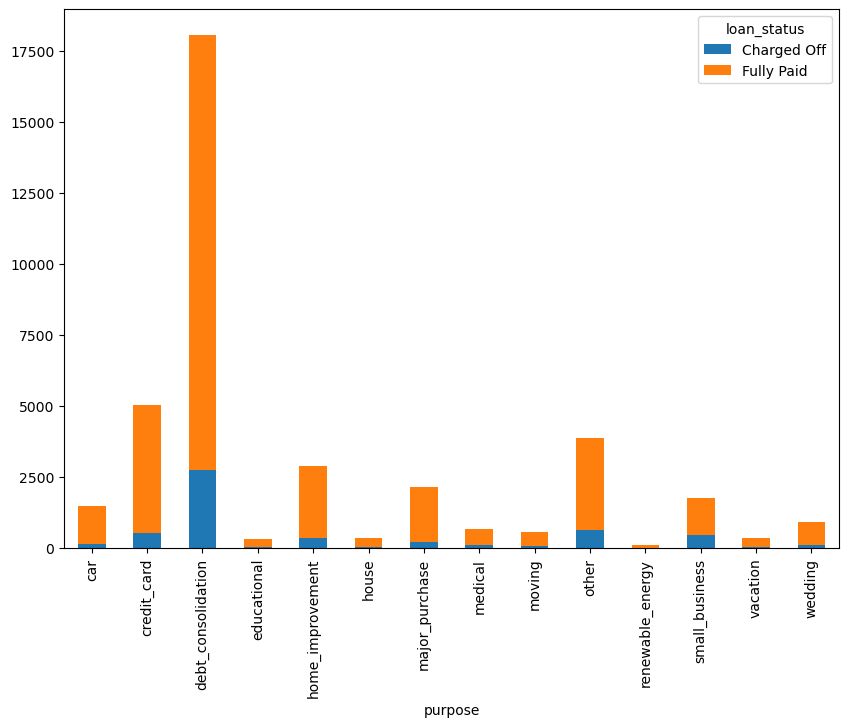

In [36]:
print("Graph 3")
# Count fully paid and charged off members across various purpose for which they avail loans
status_wise_count = pd.pivot_table(data=df1, values="loan_amnt", index="purpose", columns="loan_status", aggfunc="count")
status_wise_count.plot(kind="bar", stacked="True", figsize=[10,7])

#Obersvation
# There is a clear outlier that members with purpose as "Credit Card" and "Debt consolidation" are at higher risk of loan defaulting

In [37]:
print("Graph 4")
#Derive percentages of Charged off vs Fully paid across Purpose
status_wise_count["total"] = status_wise_count["Charged Off"] + status_wise_count["Fully Paid"]
status_wise_count

Graph 4


loan_status,Charged Off,Fully Paid,total
purpose,,,
car,160,1339,1499
credit_card,542,4485,5027
debt_consolidation,2767,15288,18055
educational,56,269,325
home_improvement,347,2528,2875
house,59,308,367
major_purchase,222,1928,2150
medical,106,575,681
moving,92,484,576


In [38]:
status_wise_per = pd.DataFrame()
status_wise_per["Charged Off"] = status_wise_count["Charged Off"] / status_wise_count["total"] 
status_wise_per["Fully Paid"] = status_wise_count["Fully Paid"] / status_wise_count["total"] 
status_wise_per

,Charged Off,Fully Paid
purpose,,
car,0.106738,0.893262
credit_card,0.107818,0.892182
debt_consolidation,0.153254,0.846746
educational,0.172308,0.827692
home_improvement,0.120696,0.879304
house,0.160763,0.839237
major_purchase,0.103256,0.896744
medical,0.155653,0.844347
moving,0.159722,0.840278


<Axes: xlabel='purpose'>

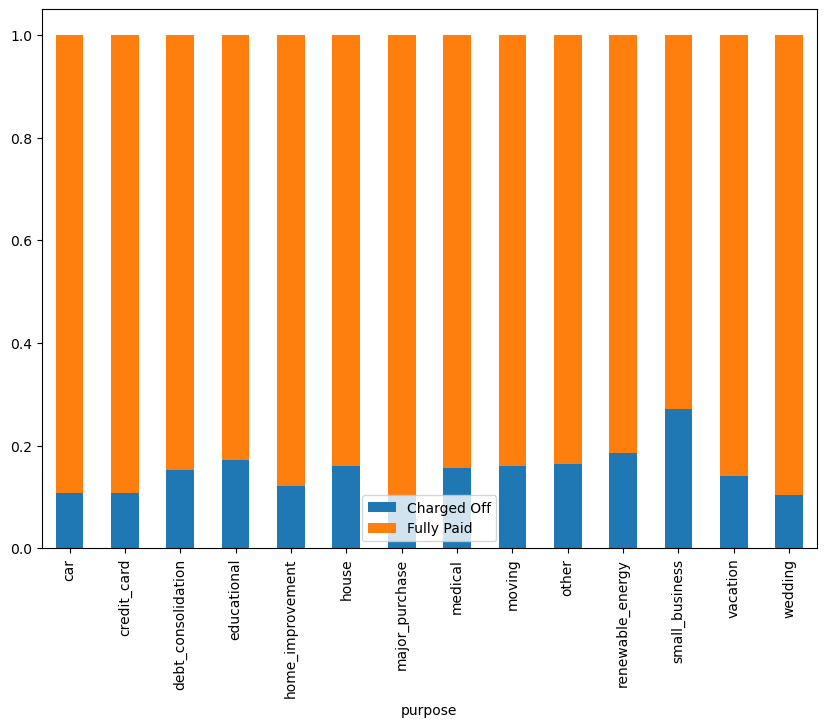

In [39]:
status_wise_per.plot(kind="bar", stacked="True", figsize=[10,7])

#Obersvation
# There is a clear outlier from percentages that members with purpose as "Small Business" are at higher risk of loan defaulting

Graph 5


<Axes: xlabel='loan_status'>

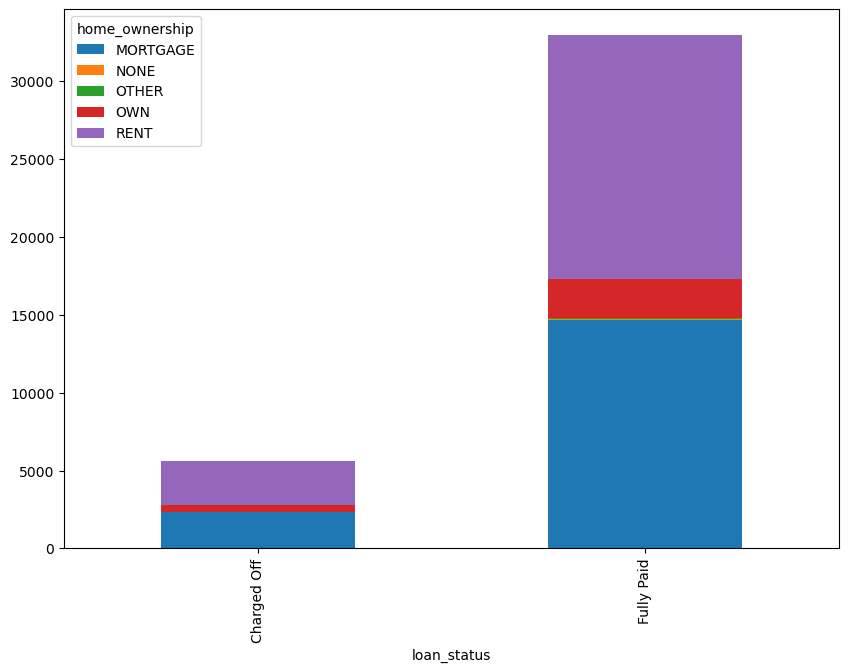

In [40]:
print("Graph 5")
# Home Ownership analysis 
ownership_wise_count = pd.pivot_table(data=df1, values="loan_amnt", index="loan_status", columns="home_ownership", aggfunc="count")
ownership_wise_count.plot(kind="bar", stacked="True", figsize=[10,7])
# Observation
# There is no significant difference in home ownership of members who avail loan. 

Graph 6


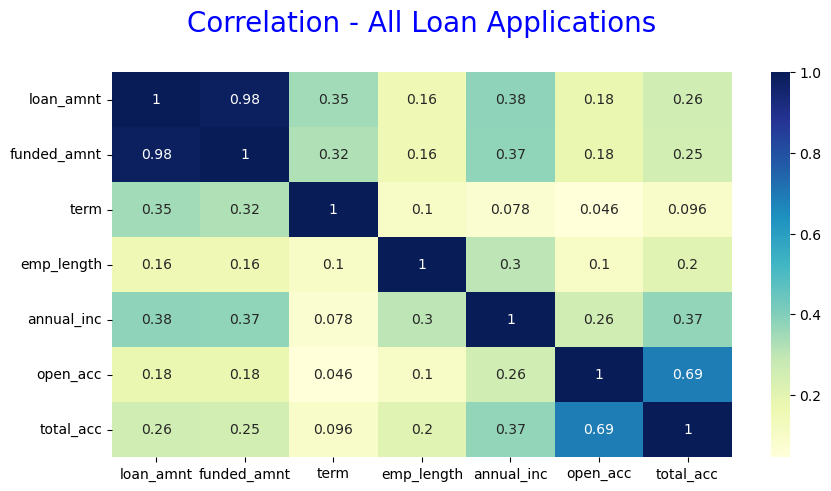

In [41]:
print("Graph 6")
# Correlation graph on columns loan_amnt, funded_amnt, term, emp_length, annual_inc, open_acc, total_acc

corrdf = df1[['loan_amnt','funded_amnt','term','emp_length','annual_inc','open_acc', 'total_acc']].corr()
corrdf
plt.figure(figsize=[10,5])
sns.heatmap(corrdf, cmap="YlGnBu", annot = True)
plt.title('Correlation - All Loan Applications\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})
plt.show()

# Observation - Unable to derive correlation across numerical data.  

In [42]:
print("Graph 7")
# Region wise split of Fully Paid Vs Charged Off
region_wise_count = pd.pivot_table(data=df1, values="loan_amnt", index="addr_state", columns="loan_status", aggfunc="count")
region_wise_count.loc[np.isnan(region_wise_count["Charged Off"]), ("Charged Off")] = 0.0
region_wise_count.loc[np.isnan(region_wise_count["Fully Paid"]), ("Fully Paid")] = 0.0

Graph 7


<Axes: xlabel='addr_state'>

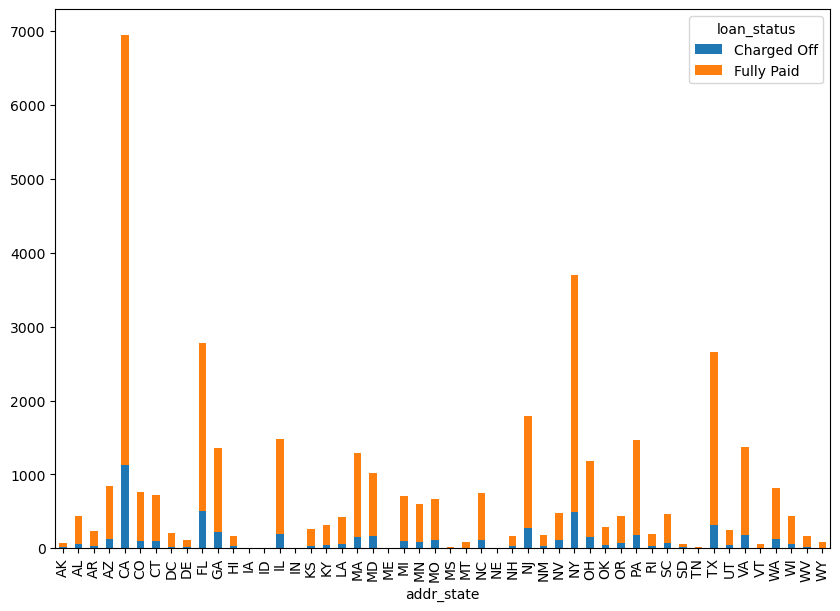

In [43]:
region_wise_count.plot(kind="bar", stacked="True", figsize=[10,7])

#Observation
#Members from state of CA, FL, NY have higher count of defaulters. 

In [44]:
region_wise_count["total"] = region_wise_count["Charged Off"] + region_wise_count["Fully Paid"]
region_wise_count

loan_status,Charged Off,Fully Paid,total
addr_state,,,
AK,15.0,63.0,78.0
AL,54.0,381.0,435.0
AR,27.0,208.0,235.0
AZ,123.0,726.0,849.0
CA,1125.0,5824.0,6949.0
CO,98.0,668.0,766.0
CT,94.0,632.0,726.0
DC,15.0,196.0,211.0
DE,12.0,101.0,113.0


In [45]:
print("Graph 8")
# Region wise split of Fully Paid Vs Charged Off - Derive percentages
region_wise_per = pd.DataFrame()
region_wise_per["Charged Off"] = region_wise_count["Charged Off"] / region_wise_count["total"] 
region_wise_per["Fully Paid"] = region_wise_count["Fully Paid"] / region_wise_count["total"] 
region_wise_per

Graph 8


,Charged Off,Fully Paid
addr_state,,
AK,0.192308,0.807692
AL,0.124138,0.875862
AR,0.114894,0.885106
AZ,0.144876,0.855124
CA,0.161894,0.838106
CO,0.127937,0.872063
CT,0.129477,0.870523
DC,0.071090,0.928910
DE,0.106195,0.893805


<Axes: xlabel='addr_state'>

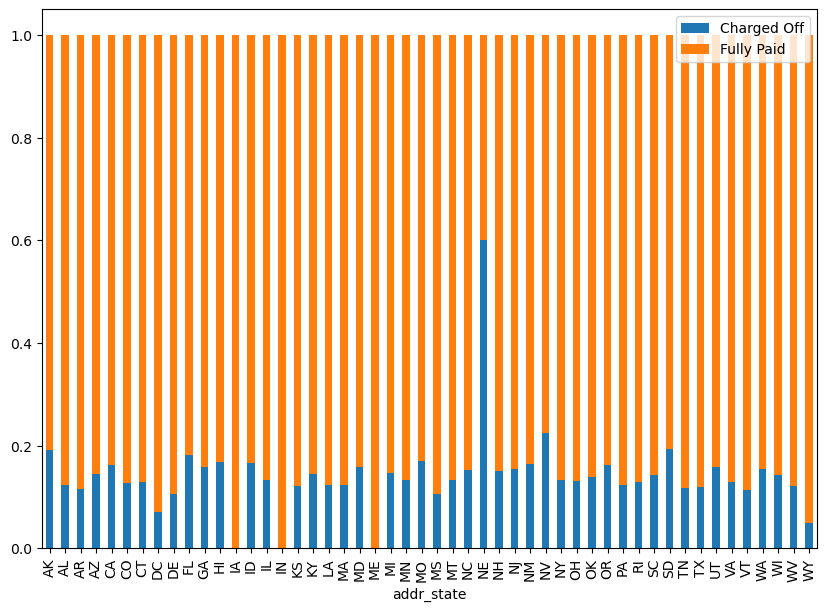

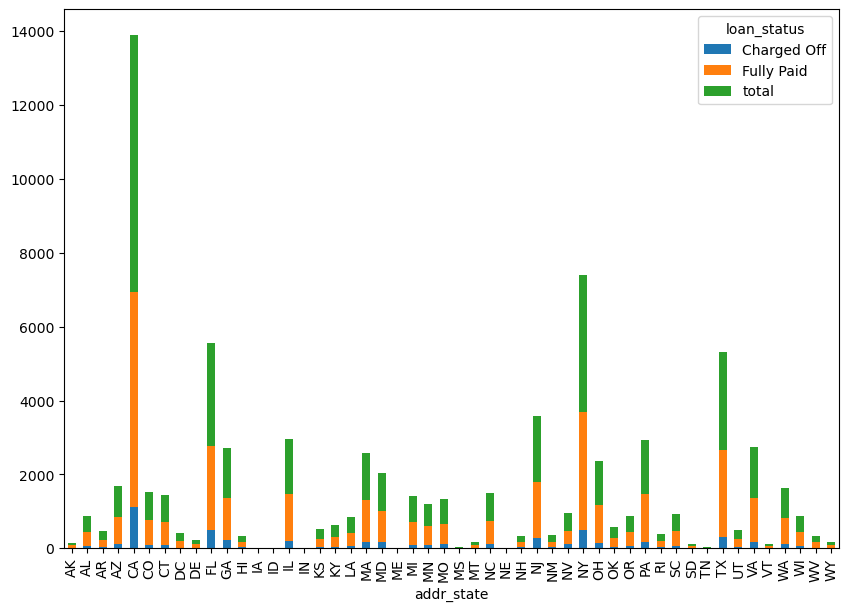

In [46]:
region_wise_per.plot(kind="bar", stacked="True", figsize=[10,7])

region_wise_count.plot(kind="bar", stacked="True", figsize=[10,7])

# Observation
# From a percentages perspective the states (NE (count is low), NV, SD and FL) have higher defaulters and thus a risk states to grant loans to members. 